# Bias

***

**[Bias - HyperStat Online](http://davidmlane.com/hyperstat/A9257.html)**

*[http://davidmlane.com/hyperstat/A9257.html](http://davidmlane.com/hyperstat/A9257.html)*

***

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10

## Location and scale

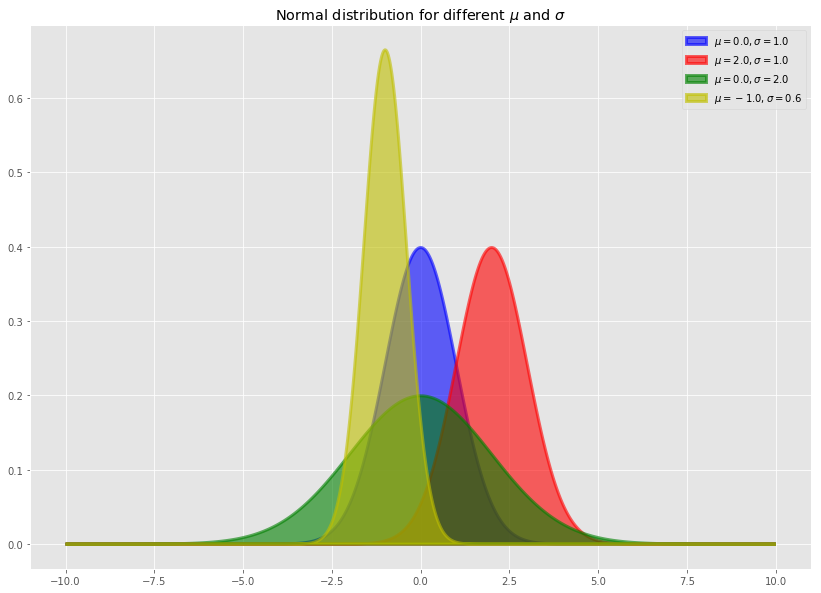

In [3]:
x = np.linspace(-10.0, 10.0, 1000)

plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=1.0), label="$\mu = 0.0, \sigma = 1.0$", c='b', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc= 2.0, scale=1.0), label="$\mu = 2.0, \sigma = 1.0$", c='r', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=2.0), label="$\mu = 0.0, \sigma = 2.0$", c='g', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=-1.0, scale=0.6), label="$\mu =-1.0, \sigma = 0.6$", c='y', alpha=0.6, lw=3.0)

plt.title("Normal distribution for different $\mu$ and $\sigma$")
plt.legend();

## Probability

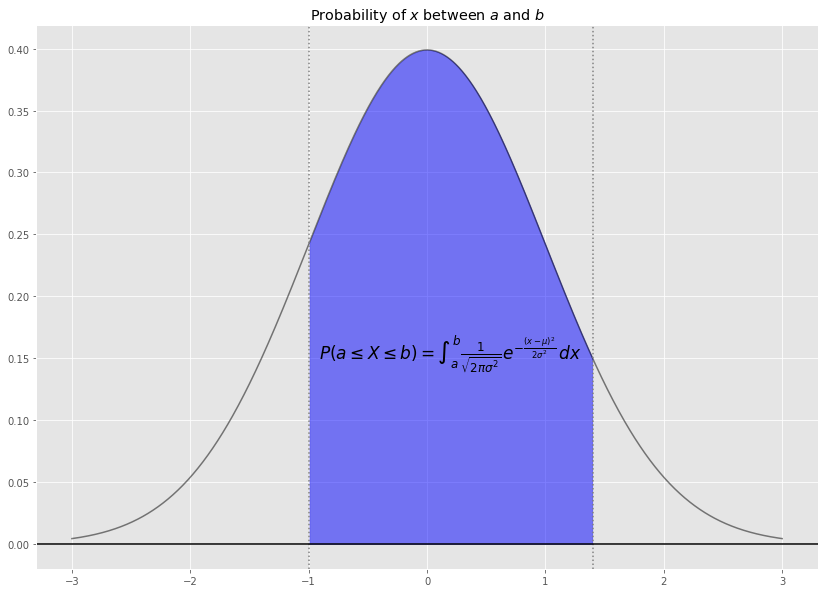

In [4]:
x = np.linspace(-3.0, 3.0, 1000)
y = ss.norm.pdf(x, loc= 0.0, scale=1.0)

xseg = x[np.logical_and(-1.0 < x,  x < 1.4)]
yseg = y[np.logical_and(-1.0 < x,  x < 1.4)]

plt.plot(x, y, color='k', alpha=0.5)
plt.fill_between(xseg, yseg, color='b', alpha=0.5)
plt.axvline(x=-1.0, color='grey', linestyle=':')
plt.axvline(x= 1.4, color='grey', linestyle=':')

plt.text(0.2, 0.15,
         r'$P (a \leq X \leq b) = \int_a^b \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} } \, dx$',
         horizontalalignment='center', size=17)

plt.axhline(y= 0.0, color='black', linestyle='-')

plt.title("Probability of $x$ between $a$ and $b$");

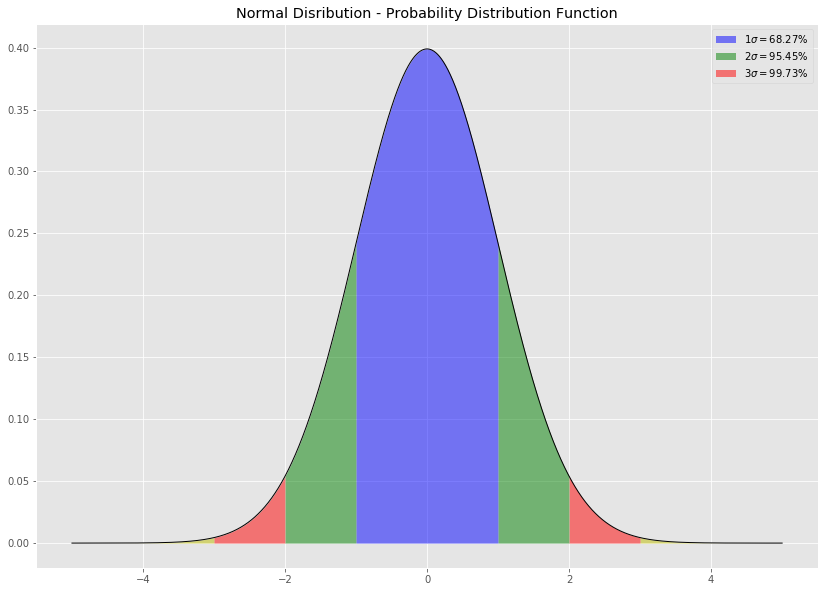

In [5]:
x = np.linspace(-5.0, 5.0, 10000)
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0)

xseg = x[np.logical_and(-5.0 <= x, x <= -3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-3.0 <= x, x <= -2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-2.0 <= x, x <= -1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-1.0 <= x, x <=  1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='b', alpha=0.5, linewidth=0, label="$1 \sigma = 68.27\%$")
xseg = x[np.logical_and( 1.0 <= x, x <=  2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0, label="$2 \sigma = 95.45\%$")
xseg = x[np.logical_and( 2.0 <= x, x <=  3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0, label="$3 \sigma = 99.73\%$")
xseg = x[np.logical_and( 3.0 <= x, x <=  5.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)

plt.title("Normal Disribution - Probability Distribution Function")
plt.legend();

## Sampling distribution

In [6]:
np.set_printoptions(formatter={'float': lambda x: "{0:6.3f}".format(x)})

sampsize = 10
nosamps = 1000

samp = np.random.standard_normal((nosamps, sampsize))

print(samp)

[[ 0.473  0.342 -1.088 ... -0.103  0.332  0.327]
 [-0.159 -0.917  0.213 ...  0.645  1.101 -1.220]
 [-1.581  0.369  0.565 ... -0.689  0.547 -1.267]
 ...
 [-0.826 -0.147 -0.641 ...  0.508 -0.303  0.708]
 [ 0.292  0.795 -0.420 ... -0.036  0.512 -1.995]
 [ 0.835 -0.075 -0.684 ...  1.716  0.502  1.194]]


In [7]:
mean = samp.sum(axis=1) / sampsize
print(mean)

[ 0.030 -0.096 -0.529  0.188 -0.198 -0.141 -0.106  0.214 -0.385  0.119
  0.059  0.399  0.260  0.456  0.142  0.258 -0.091  0.259  0.397  0.265
  0.296  0.086  0.115 -0.071 -0.304  0.097 -0.158 -0.265  0.246 -0.500
 -0.383 -0.143  0.123  0.062  0.692 -0.176 -0.062  0.439 -0.055  0.429
 -0.529 -0.266 -0.052  0.282 -0.188 -0.446  0.176  0.289  0.292  0.381
  0.614  0.587  0.386 -0.043 -0.093  0.317 -0.105 -0.108 -0.161 -0.099
 -0.022 -0.597  0.114  0.109  0.026 -0.469  0.377 -0.127  0.141  0.197
  0.407  0.777 -0.099  0.343 -0.275  0.058 -0.218  0.058 -0.312  0.279
  0.006  0.422  0.053 -0.125 -0.647 -0.206 -0.070 -0.325  0.827 -0.048
  0.037 -0.374 -0.238  0.632 -0.254  0.098  0.387 -0.393  0.150  0.254
 -0.330 -0.076  0.214  0.014  0.326  0.121 -0.154  0.125  0.214  0.347
  0.339 -0.086 -0.326 -0.008 -0.398 -0.237  0.530 -0.158  0.390 -0.529
 -0.248 -0.632 -0.136  0.221  0.029  0.267  1.002  0.359  0.208 -0.460
 -0.077 -0.365 -0.256 -0.044 -0.240  0.020  0.626  0.406  0.277 -0.142
 -0.39

In [8]:
# Calculate the variance.
vari = (samp - mean[:, np.newaxis])**2
vari = vari.sum(axis=1) / (sampsize)

# Without the correction.
mean_vari = vari.sum() / nosamps
print(mean_vari)

# Using Bessel's correction: https://en.wikipedia.org/wiki/Bessel%27s_correction
print(mean_vari * (sampsize / (sampsize - 1.0)))

0.9026900725759749
1.002988969528861


C:\Users\mclou\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


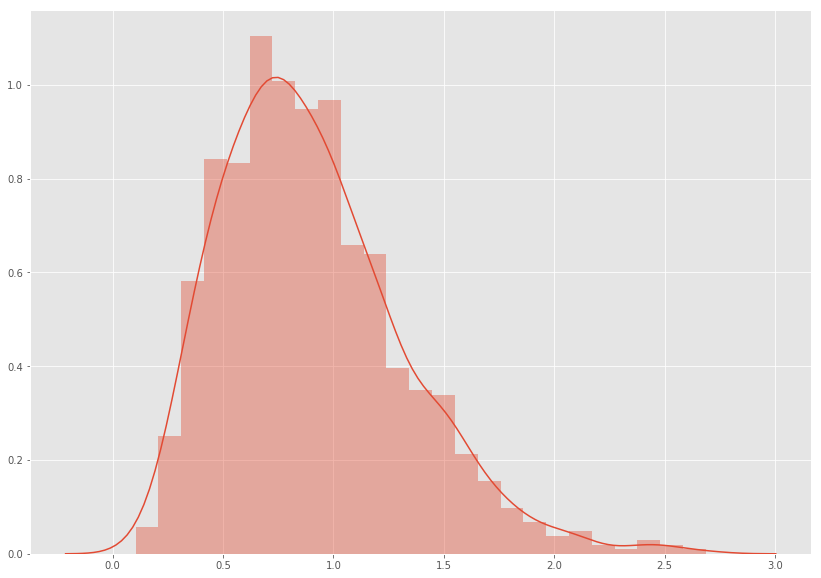

In [9]:
sns.distplot(vari);

## End